In [1]:
import pandas as pd
import requests
import datetime

def create_data_object(line):
    (data, ts) = line
    return {
        'timestamp': ts,
        'cloud_amount': float(data[0]),
        'pressure': float(data[1]),
        'percipitation_amount': float(data[2]),
        'relative_humidity': float(data[3]),
        'precipitation_intensity': float(data[4]),
        'snow_depth': float(data[5]),
        'air_temperature': float(data[6]),
        'dew_point_temperature': float(data[7]),
        'horizontal_visibility': float(data[8]),
        'wind_direction': float(data[9]),
        'gust_speed': float(data[10]),
        'wind_speed': float(data[11])
    }

def get_data(start_date, end_date):
    response = requests.get(f'https://1.opendata.fmi.fi/wfs/eng?request=getFeature&storedquery_id=fmi%3A%3Aobservations%3A%3Aweather%3A%3Amultipointcoverage&parameters=n_man%2Cp_sea%2Cr_1h%2Crh%2Cri_10min%2Csnow_aws%2Ct2m%2Ctd%2Cvis%2Cwd_10min%2Cwg_10min%2Cws_10min&starttime={start_date}&endtime={end_date}&timestep=60&fmisid=101004')
    text = response.text
    
    timestamps_and_pos = text.split('<gmlcov:positions>')[1].split('</gmlcov:positions>')[0]
    timestamps = [datetime.datetime.utcfromtimestamp(int(ts.split(' ')[-1])) for ts in timestamps_and_pos.split('\n') if ts.split(' ')[-1] != '']
    
    data_rows = text.split('<gml:doubleOrNilReasonTupleList>')[1].split('</gml:doubleOrNilReasonTupleList>')[0].split('\n')
    data = [dr.strip().split(' ') for dr in data_rows if dr.strip() != '']

    merged = zip(data, timestamps)

    return map(create_data_object, merged)

data = []
end_time = datetime.datetime.fromisoformat('2021-01-01T00:00:00')
while end_time.isoformat() != '2010-01-01T00:00:00':
    start_time = end_time - datetime.timedelta(weeks=1)
    print(f'from {start_time.isoformat()} to {end_time.isoformat()}')
    res = get_data(start_time.isoformat(), end_time.isoformat())
    data.append(list(res))
    end_time = start_time
    print('done!')


from 2020-12-25T00:00:00 to 2021-01-01T00:00:00
done!
from 2020-12-18T00:00:00 to 2020-12-25T00:00:00
done!
from 2020-12-11T00:00:00 to 2020-12-18T00:00:00
done!
from 2020-12-04T00:00:00 to 2020-12-11T00:00:00
done!
from 2020-11-27T00:00:00 to 2020-12-04T00:00:00
done!
from 2020-11-20T00:00:00 to 2020-11-27T00:00:00
done!
from 2020-11-13T00:00:00 to 2020-11-20T00:00:00
done!
from 2020-11-06T00:00:00 to 2020-11-13T00:00:00
done!
from 2020-10-30T00:00:00 to 2020-11-06T00:00:00
done!
from 2020-10-23T00:00:00 to 2020-10-30T00:00:00
done!
from 2020-10-16T00:00:00 to 2020-10-23T00:00:00
done!
from 2020-10-09T00:00:00 to 2020-10-16T00:00:00
done!
from 2020-10-02T00:00:00 to 2020-10-09T00:00:00
done!
from 2020-09-25T00:00:00 to 2020-10-02T00:00:00
done!
from 2020-09-18T00:00:00 to 2020-09-25T00:00:00
done!
from 2020-09-11T00:00:00 to 2020-09-18T00:00:00
done!
from 2020-09-04T00:00:00 to 2020-09-11T00:00:00
done!
from 2020-08-28T00:00:00 to 2020-09-04T00:00:00
done!
from 2020-08-21T00:00:00 to 

done!
from 2018-01-26T00:00:00 to 2018-02-02T00:00:00
done!
from 2018-01-19T00:00:00 to 2018-01-26T00:00:00
done!
from 2018-01-12T00:00:00 to 2018-01-19T00:00:00
done!
from 2018-01-05T00:00:00 to 2018-01-12T00:00:00
done!
from 2017-12-29T00:00:00 to 2018-01-05T00:00:00
done!
from 2017-12-22T00:00:00 to 2017-12-29T00:00:00
done!
from 2017-12-15T00:00:00 to 2017-12-22T00:00:00
done!
from 2017-12-08T00:00:00 to 2017-12-15T00:00:00
done!
from 2017-12-01T00:00:00 to 2017-12-08T00:00:00
done!
from 2017-11-24T00:00:00 to 2017-12-01T00:00:00
done!
from 2017-11-17T00:00:00 to 2017-11-24T00:00:00
done!
from 2017-11-10T00:00:00 to 2017-11-17T00:00:00
done!
from 2017-11-03T00:00:00 to 2017-11-10T00:00:00
done!
from 2017-10-27T00:00:00 to 2017-11-03T00:00:00
done!
from 2017-10-20T00:00:00 to 2017-10-27T00:00:00
done!
from 2017-10-13T00:00:00 to 2017-10-20T00:00:00
done!
from 2017-10-06T00:00:00 to 2017-10-13T00:00:00
done!
from 2017-09-29T00:00:00 to 2017-10-06T00:00:00
done!
from 2017-09-22T00:00:

done!
from 2015-02-27T00:00:00 to 2015-03-06T00:00:00
done!
from 2015-02-20T00:00:00 to 2015-02-27T00:00:00
done!
from 2015-02-13T00:00:00 to 2015-02-20T00:00:00
done!
from 2015-02-06T00:00:00 to 2015-02-13T00:00:00
done!
from 2015-01-30T00:00:00 to 2015-02-06T00:00:00
done!
from 2015-01-23T00:00:00 to 2015-01-30T00:00:00
done!
from 2015-01-16T00:00:00 to 2015-01-23T00:00:00
done!
from 2015-01-09T00:00:00 to 2015-01-16T00:00:00
done!
from 2015-01-02T00:00:00 to 2015-01-09T00:00:00
done!
from 2014-12-26T00:00:00 to 2015-01-02T00:00:00
done!
from 2014-12-19T00:00:00 to 2014-12-26T00:00:00
done!
from 2014-12-12T00:00:00 to 2014-12-19T00:00:00
done!
from 2014-12-05T00:00:00 to 2014-12-12T00:00:00
done!
from 2014-11-28T00:00:00 to 2014-12-05T00:00:00
done!
from 2014-11-21T00:00:00 to 2014-11-28T00:00:00
done!
from 2014-11-14T00:00:00 to 2014-11-21T00:00:00
done!
from 2014-11-07T00:00:00 to 2014-11-14T00:00:00
done!
from 2014-10-31T00:00:00 to 2014-11-07T00:00:00
done!
from 2014-10-24T00:00:

done!
from 2012-03-23T00:00:00 to 2012-03-30T00:00:00
done!
from 2012-03-16T00:00:00 to 2012-03-23T00:00:00
done!
from 2012-03-09T00:00:00 to 2012-03-16T00:00:00
done!
from 2012-03-02T00:00:00 to 2012-03-09T00:00:00
done!
from 2012-02-24T00:00:00 to 2012-03-02T00:00:00
done!
from 2012-02-17T00:00:00 to 2012-02-24T00:00:00
done!
from 2012-02-10T00:00:00 to 2012-02-17T00:00:00
done!
from 2012-02-03T00:00:00 to 2012-02-10T00:00:00
done!
from 2012-01-27T00:00:00 to 2012-02-03T00:00:00
done!
from 2012-01-20T00:00:00 to 2012-01-27T00:00:00
done!
from 2012-01-13T00:00:00 to 2012-01-20T00:00:00
done!
from 2012-01-06T00:00:00 to 2012-01-13T00:00:00
done!
from 2011-12-30T00:00:00 to 2012-01-06T00:00:00
done!
from 2011-12-23T00:00:00 to 2011-12-30T00:00:00
done!
from 2011-12-16T00:00:00 to 2011-12-23T00:00:00
done!
from 2011-12-09T00:00:00 to 2011-12-16T00:00:00
done!
from 2011-12-02T00:00:00 to 2011-12-09T00:00:00
done!
from 2011-11-25T00:00:00 to 2011-12-02T00:00:00
done!
from 2011-11-18T00:00:

In [2]:
def flat(l):
    return [item for sublist in l for item in sublist]

df = pd.DataFrame(flat(data))

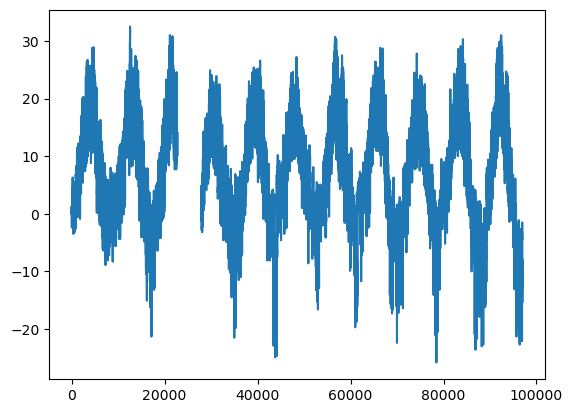

In [3]:
import matplotlib.pyplot as plt

plt.plot(df['air_temperature'])

In [4]:
df.to_csv('./data/weather.csv', index=False)

In [8]:
df.loc[22000:23000]

,timestamp,cloud_amount,pressure,percipitation_amount,relative_humidity,precipitation_intensity,snow_depth,air_temperature,dew_point_temperature,horizontal_visibility,wind_direction,gust_speed,wind_speed
22000,2018-06-30 06:00:00,0.0,1014.5,0.0,50.0,0.0,-1.0,14.9,4.7,48630.0,310.0,9.0,5.3
22001,2018-06-30 07:00:00,1.0,1014.7,0.0,48.0,0.0,-1.0,15.0,4.2,44030.0,321.0,10.9,6.7
22002,2018-06-30 08:00:00,5.0,1015.2,0.0,46.0,0.0,-1.0,15.1,3.6,49720.0,317.0,11.7,7.1
22003,2018-06-30 09:00:00,3.0,1015.5,0.0,41.0,0.0,-1.0,16.4,3.2,36080.0,308.0,10.9,6.9
22004,2018-06-30 10:00:00,5.0,1015.7,0.0,39.0,0.0,-1.0,16.0,2.2,50000.0,335.0,11.8,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22996,2018-05-18 12:00:00,7.0,1012.6,0.0,31.0,0.0,0.0,NaN,NaN,23400.0,317.0,13.3,7.6
22997,2018-05-18 13:00:00,7.0,1012.4,0.0,31.0,0.0,0.0,NaN,NaN,38310.0,331.0,11.6,7.2
22998,2018-05-18 14:00:00,7.0,1012.5,0.0,27.0,0.0,0.0,NaN,NaN,43630.0,335.0,10.3,6.1
22999,2018-05-18 15:00:00,0.0,1012.5,0.0,26.0,0.0,0.0,NaN,NaN,40080.0,327.0,12.4,7.3
